In [220]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO

import requests

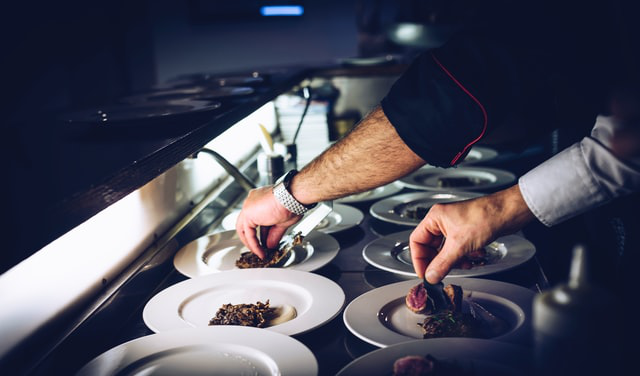

In [221]:
url = 'https://unsplash.com/photos/boaDpmC-_Xo/download?ixid=MnwxMjA3fDB8MXxhbGx8MXx8fHx8fDJ8fDE2MzQ2ODI0MzQ&force=true&w=640'
response = requests.get(url)

image = Image.open(BytesIO(response.content)).convert()
image

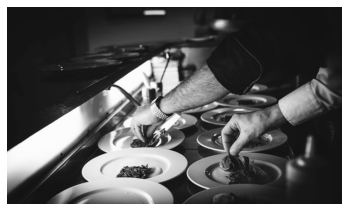

In [222]:
img_arr = np.copy(image)
# img_arr.shape
img_gray_average = np.mean(img_arr, axis=2)

# img_gray_average

plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()

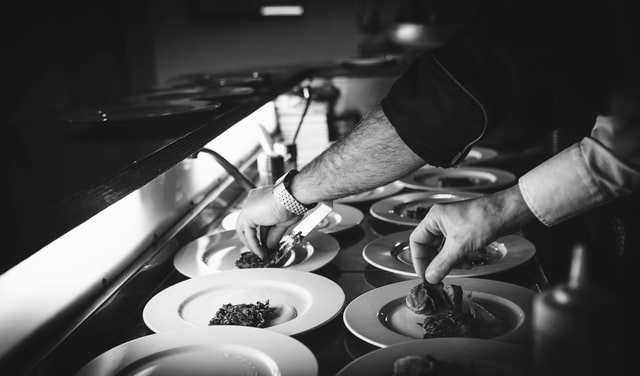

In [223]:
new_img_gray_average = np.empty(shape=img_arr.shape, dtype=np.uint8)
new_img_gray_average[:,:,0] = img_gray_average
new_img_gray_average[:,:,1] = img_gray_average
new_img_gray_average[:,:,2] = img_gray_average

new_img_gray_average

img_res = Image.fromarray(new_img_gray_average)
img_res

In [224]:
img_gray_average.shape

(376, 640)

#Aplicação do luminance perception
$ Y_{linear} = 0.2126R_{linear} + 0.7152G_{linear} + 0.0722B_{linear}$

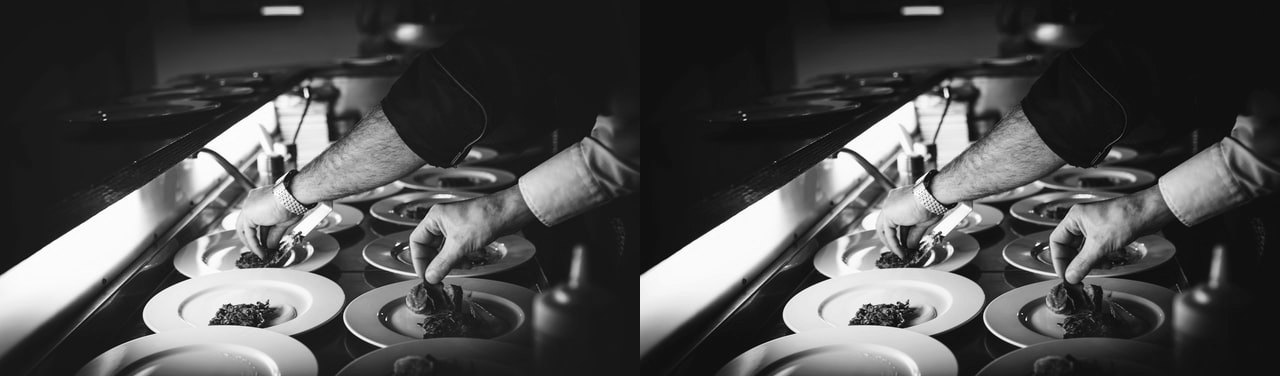

In [225]:
pesos = [0.2126, 0.7152, 0.0722]

res = np.array(img_arr * pesos, dtype=np.uint8)
y = np.array(np.sum(res, axis=2), dtype=np.uint8)

concat = np.array(np.concatenate((img_gray_average,y), axis=1), dtype=np.uint8)

img_ones = Image.fromarray(concat)
img_ones

In [226]:
print(res[0,0,:])
print(img_arr[0,0,:])

[ 2 12  2]
[12 17 39]


In [227]:
res.shape

(376, 640, 3)

In [228]:
np.sum(res, axis=2).shape

(376, 640)

In [229]:
full = 1408 * 2400 * 3
original = 2750 *  4687 * 3

print(f"full: {full}, original: {original} {original/full}")

full: 10137600, original: 38667750 3.8142903645833335


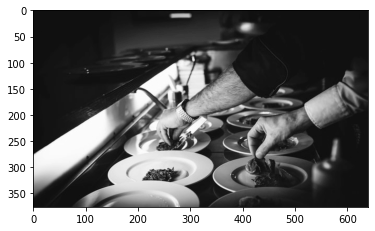

In [230]:
new_array_test = np.sum(res, axis=2)
type(new_array_test)

plt.imshow(new_array_test, cmap='gray')
plt.show()

# Compressão $\gamma$

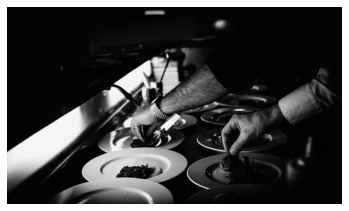

In [238]:
i = np.asarray(new_img_gray_average).copy()
y = i.copy()/255
if y[:,:,:].any() <= 0.04045:
  y[:,:,:] = y[:,:,:] / 12.92
else:
  y[:,:,:] = (((y[:,:,:]+0.055)/1.055)**2.4)

plt.imshow(y)
plt.axis("off")
plt.show()

# Aproximação linear

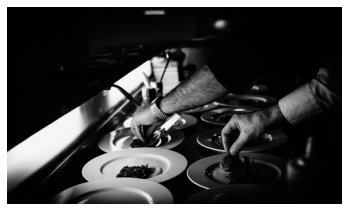

In [216]:
i = np.asarray(y).copy()
linear = i.copy()
lin = 0.299 * linear[:,:,0] + 0.587 * linear[:,:,1] + 0.114 * linear[:,:,2]
linear[:,:,0] = lin
linear[:,:,1] = lin
linear[:,:,2] = lin

plt.imshow(linear)
plt.axis("off")
plt.show()